# PROBLEM STATEMENT 
Hiring and retaining employees require capital, time and skills. In the US, firms face an average churn of about 10%-15%, and this churn can prove costly. It is estimated that an unwanted departure of an employee can cost the firm anywhere from 30% (of his/her annual salary) for more junior employees to 400% for much more senior employees. The difficulty of finding a replacement and bringing that replacement to the same level of productivity, the lost knowledge and know-how, and the period where resources have to carry the extra load of a missing colleague can be serious problems, especially for firms that face a higher rate of attrition.

Understanding the reasons and anticipating when an employee is most likely to leave could lead to take preventive actions and planning new hirings in advance, reducing the costs above mentioned. To do so, HR has collected extensive historical data on their employees, such as job satisfaction, performance rating, work like balance... HR is also providing a variable (attrition) that indicates if the employee left the company or not.

We are provided with the labels, so we are facing a supervised learning problem, and since we need to predict two categories (attrition yer or not), we are facing a supervised learning binary classification problem.


#### Data Description

- Age: Age of the employee.
- Attrition: Target variable. Indicates wether the employee left (1) or stayed (0)
- BusinessTravel: Ferquency of travel. Values: Travel_Rarely', 'Travel_Frequently', 'Non-Travel'
- DailyRate: Daily salary
- Department: Department the employee belong to. Values: 'Sales', 'Research & Development', 'Human Resources'
- DistanceFromHome: Distance from home to the office/working place.
- Education: Level of education. Values: 1'Below College',2'College',3 'Bachelor',4 'Master',5 'Doctor'
- Education Field: field of education. Values: 'Life Sciences', 'Other', 'Medical', 'Marketing','Technical Degree', 'Human Resources'
- EmployeeCount: number of employees in the company.
- EmployeeNumber: internal company employee id.
- Environment Satisfaction: index of satisfaction with the comapny environment. Values: 1 'Low', 2 'Medium',3 'High',4 'Very High'
- Gender: Fema;e/Male
- HourlyRate: Houly salary rate
- JobInvolvement: psychological and emotional extent to which someone participates in his/her work, profession, and company.
  Values:1 'Low',2 'Medium',3 'High',4 'Very High'
- JobLevel: job level from less level (1) to higher level (5)
- JobRole: job role. Values: 'Sales Executive', 'Research Scientist', 'Laboratory Technician','Manufacturing Director', 
  'Healthcare    Representative', 'Manager','Sales Representative', 'Research Director', 'Human Resources'
- JobSatisfaction: job satisfaction. Values: 1 'Low',2 'Medium',3 'High',4 'Very High'
- MaritalStatus: marital status. Values: 'Single', 'Married', 'Divorced'
- MonthlyIncome: monthly income of the employee.
- MonthlyRate: monthly salary of the employee.
- NumCompaniesWorked:number of companies that the employee has worked.
- Over18: indicates if the employer is older tahn 18 or not.
- OverTime: indicates if the mployee works overtime or not.
- PercentSalaryHike: percentage of salary increase.
- PerformanceRating: performance rating. Values: 1 'Low',2 'Good',3 'Excellent',4 'Outstanding'
- RelationshipSatisfaction: Degree of satisfaction with manager/other employees? values: 1 'Low',2 'Medium',3 'High',4 'Very High'
- StandardHours: number of hours worked.
- StockOptionLevel: option to company stock options as part of the compensation package.
- TotalWorkingYears: number of years worked for the company.
- TrainingTimesLastYear: how many times the employee received training during last year.
- WorkLifeBalance: degree of work-life balance. Values: 1 'Bad',2 'Good',3 'Better',4 'Best'
- YearsAtCompany:  number of years working in the company.
- YearsInCurrentRole: number of years in current role.
- YearsSinceLastPromotion:  number of years since last promotion.
- YearsWithCurrManager: number of years with current manager.



## PRELIMINARY HYPOTHESIS
Before proceding with the analysis itself, we can establish a set of expectations:

Variables that we expect to reduce the employee attrition:
- 'HourlyRate','DailyRate', 'MonthlyIncome', 'MonthlyRate': for all this salary related variables, we can expect the employees with higher salaries to  have a lower rate of attrition.
- 'PercentSalaryHike': those employees that have had a salary increase probably present a lower rate of attrition
- 'TotalWorkingYears': Usually, mobility among employeers less working years who are starting their careers tends to be higher
- 'EnvironmentSatisfaction', 'WorkLifeBalance','JobSatisfaction',  'JobInvolvement','RelationshipSatisfaction': All this variables looks like straighforward. The higher the satisfaction with working conditions, the lesser the reason to leave the company.
- 'PerformanceRating': Seems reasonable to expect that those employees with higher performance rating usually stay ath the company.
- 'JobLevel': Probably more senior workers present a lower rate of attrition.
-'StockOptionLevel': Employees with this benefit will tend to stay more in the company.
-'TrainingTimesLastYear': This variable means that the company is investing in their employees. Possibily employees with more trainings are more satisfied and tend to stay longer.
-'YearsAtCompany','YearsInCurrentRole': employees with more years at the company probably will have less rate of attrition. Years in current role can actually go both ways. Longer time in a role could mean that the employee is satisfied with his/her current role. On the other side, could mean that there is no possibility for a promotion.

Variables that we expect to increase the employee attrition:

- 'NumCompaniesWorked': An employeer that has a high number of companies work for means that usually changes his/her job.
- 'DistanceFromHome': The longer distance the worst commute, which might impact the satisfaction, work life balance.
- 'OverTime': No need to comment this one, right?
- 'YearsSinceLastPromotion': longer takes to get a promotion, higher attrition.
- 'BusinessTravel': probably those emmployees that travel more frequently have a higher level of attrition.




    

## IMPORT LIBRARIES AND READ DATASETS

In [178]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score,cross_val_predict,KFold, StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE,SVMSMOTE,SMOTENC
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import tensorflow as tf
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [139]:
#Rading dataset
employee_df=pd.read_csv('Project files/Human Resources/Human_Resources[1].csv')

In [140]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## DATA STRUCTURE


In [55]:
#First rows of the dataset
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [56]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Total of 34 attributes and 1 target variables. 1470 instances with no missing values. Nine (9) of the attributes types are object and the remaining numerical. Most of this numerical are actually categorical variables that have been encoded.
The attributes   'overtime' , 'Over18' along with the target 'Attritition'are boolean (Y/N) We will replace the values  by aninteger (N/Y=> 0/1) before performing any visualization.

In [141]:
#employee_df['Attrition']=np.where(employee_df['Attrition']=='Yes',1,0)
employee_df['Attrition']=employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['OverTime']=employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['Over18']=employee_df['Over18'].apply(lambda x: 1 if x=='Y' else 0)

To get a quick feel of the type of date we plot an histogram for each numerical attribute:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002614C7ED1D0>,
      dtype=object)

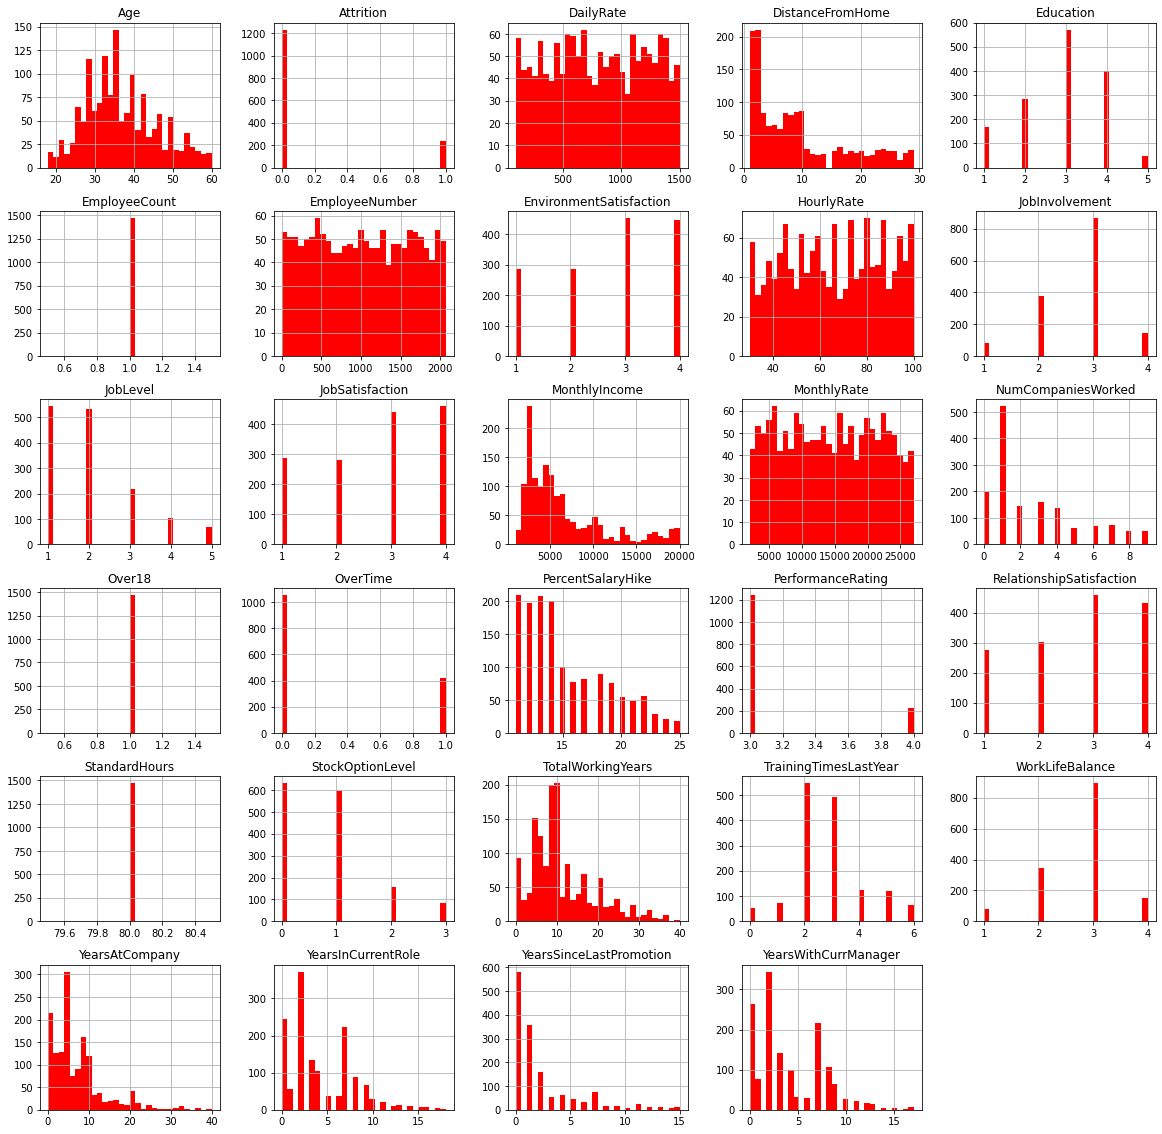

In [58]:
employee_df.hist(bins=30,figsize=(20,20),color='r')

We can draw several observations from the histograms:

- Around of 85% of the employees in the dataset stayed (attrition=0) and 15% left (attrition=1) left. The dataset is imbalanced and we might need to explore data balancing methods.
-There are several features that present tailed distributions such as  'DistanceFromHome','MonthlyIncome',TotalWorkingYears' and 'YearsAtCompany'. Depending on the model to be built later, normalization of the data might be required.
- The features 'EmployeeCount', 'Standardhours' and 'Over18'  do not change from one employee to the other, so can be dropped. It  also makes sense to drop 'EmployeeNumber' since is just and employee ID not relevant for the analysis.


In [142]:
#Dropping non relevant features
employee_df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In the dataset there are also three features that seem to be related to the salary rate: hourly rate, daily rate and monthly rate. One would think that all this three features should be strongly correlated (daily rate should be an aggregarion of horly rate and monthly rate an aggregation of the daily rate). However, if we plot a correlation heatmap , we can see that threre is no relation:

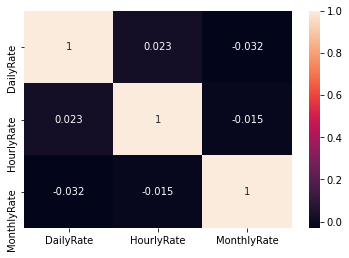

In [61]:
correlations = employee_df[['DailyRate','HourlyRate','MonthlyRate']].corr()
#f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Since we are not complety sure of what this features represent (in a real situation we would ask to the HR department), and because in the dataset there is the variable Monthly Income that provides information about the salary, we took the decision of removing these three featrues.

In [143]:
employee_df.drop(['DailyRate','HourlyRate','MonthlyRate'], axis=1,inplace=True)

We will now split the dataset into training and test subsets. We are doing the split before the EDA and not later (before the model selection) to avoid the data snooping bias. The EDA can influence our decissions so to make it closer to a real situation we shouldn't be able to analyze the testing data. Since the dataset is unbalanced. we will do a stratified sampling.

In [144]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(employee_df,employee_df['Attrition']):
    employee_df_train=employee_df.loc[train_index]
    employee_df_test=employee_df.loc[test_index]

## EXPLORATORY DATA ANALYSIS (EDA)

### Target Variable

In [11]:
# Count the number of employees who stayed and left
print('Total=',len(employee_df_train))
print('Number of employees who left=',len(employee_df_train[employee_df_train['Attrition']==1]))
print('% of employees who left=','{:.2f} %'.format(len(employee_df_train[employee_df_train['Attrition']==1])/len(employee_df_train)*100))  
print('Number of employees who stayed=',len(employee_df_train[employee_df_train['Attrition']==0]))
print('% of employees who left=','{:.2f} %'.format(len(employee_df_train[employee_df_train['Attrition']==0])/len(employee_df_train)*100))  

Total= 1176
Number of employees who left= 190
% of employees who left= 16.16 %
Number of employees who stayed= 986
% of employees who left= 83.84 %


### Features vs target

In [12]:
employee_df_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,0,Travel_Rarely,Sales,2,4,Life Sciences,1,1676,2,...,3,80,3,29,2,3,3,2,1,2
128,22,0,Travel_Rarely,Research & Development,2,1,Technical Degree,1,169,3,...,3,80,1,3,2,3,2,1,2,1
810,46,0,Travel_Rarely,Sales,3,1,Marketing,1,1124,1,...,4,80,1,23,3,3,12,9,4,9
478,25,0,Travel_Rarely,Sales,13,1,Medical,1,645,2,...,3,80,0,7,1,3,7,4,0,6
491,43,0,Travel_Frequently,Research & Development,9,5,Medical,1,663,4,...,2,80,1,10,3,3,8,7,4,7


We will use stacked bars for categorical features and KDE for numerical ones.

#### Categorical features

In [18]:
#Creating one list for categorical featuresand another one for numerial features
cat_columns=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement',\
             'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus','OverTime','StockOptionLevel','WorkLifeBalance', \
             'PerformanceRating','RelationshipSatisfaction']
num_columns=['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', \
             'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

From the chart, we can draw the following conclusions:

- 'BusinessTravel' impacts the attrition. Frequent travelers present more than 20% percent, which almost triples non-travel and doubles travel-rarely.
- 'Department': There is disparity between departments.  Sales and HR have more rotation (around 20% attrition) while Reserach and Development have less.
- 'Education'(1'Below College',2'College',3 'Bachelor',4 'Master',5 'Doctor'): Seems like those employees with below college education level have higher attrition. On the opposite side, the higher level of education (doctor) presents less attrition.
- 'EducationFied': Life Sciences, Medical and Other present half of the attrition than HR and Technical Degree.
- 'EnvironemntSatisfaction (1 'Low', 2 'Medium',3 'High',4 'Very High'): Clearly, having low level of environment satisfaction impacts the attrition rate. The difference between Medium, High and Very High is not that pronounced. It seems that once certain level of environemnt satisfaction is reached, making improvements does not make too much difference.
- 'Gender:  Attrition is slighty higher in males than females.
- 'JobInvolvement' (1 'Low',2 'Medium',3 'High',4 'Very High'): The job involvement is related to the attrition. Attition it's higher for low level of job involvement and decreases gradually when the involvement increases.
- 'JobLevel': AS expected, there is more attrition in the lower level and less attrition in the top levels.
- 'JobRole': Higher attrition is for sales representatives and second one for Human Resources and Laboratory Technician. In the Department feature we also found that Sales and HR deparments are the ones with more attrition.
- 'JobSatisfaction' (1 'Low',2 'Medium',3 'High',4 'Very High'). As expected, the lower the level of job satisfaction the higher the attrition.
- 'MaritalStatus': Single employees present more attrition. This was expected since commonly married (and divorced) have families and seek more stability.
- 'OverTime': No surprise here. Employees that work overtime have a rate of attrition around four times higher.
- 'WorkLifeBalance' (1'Bad',2 'Good',3 'Better',4 'Best').  Employees with work-life balance rated as poor tend to leave. There is no much difference between having a good, better or best rate work life balance, though.
- 'PerformanceRating' ( 1 'Low',2 'Good',3 'Excellent',4 'Outstanding): There are not Low (1) and Good (2) performance rated employees in the dataset. Between Excellent and outsanting employees, there is no much difference.
- 'RelationshipSatisfaction': Values are 1 'Low',2 'Medium',3 'High',4 'Very High'. Similar behaviour than job satisfaction.  The lower the level the higher the attrition.

Overall, there are not many surprises. and we have confirmed most of the hypothesis we established before. 


#### Numerical features

In [19]:
#For visualization purposes we split the dataset between employess who left and employees who are still in the company.
current_employee=employee_df_train[employee_df_train['Attrition']==0]
ex_employee=employee_df_train[employee_df_train['Attrition']==1]

Ex-employees
              Age
mean    33.126316
median  31.000000
Current employees
              Age
mean    37.744422
median  36.000000


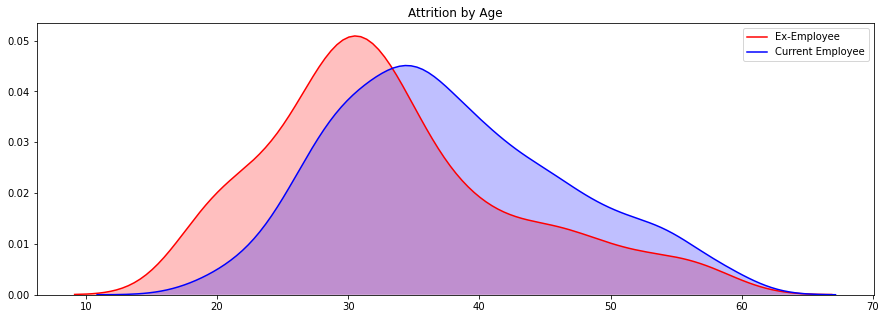

In [65]:
#Attrition by age
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['Age'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['Age'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by Age')
print('Ex-employees')
print(ex_employee.agg({'Age':['mean','median']}))
print('Current employees')
print(current_employee.agg({'Age':['mean','median']}))


Younger employees tend to leave more. At the early 30s the attrition rate gets even at around 35 years employees tend to stay more in the company than to leave. The conclusion is that the attrition rate tends to be reduced with the age. Mean age of employees who leave and who stay  is 33 and ≈38, respectively.

Ex-employees
        DistanceFromHome
mean           10.973684
median          9.000000
Current employees
        DistanceFromHome
mean            9.046653
median          7.000000


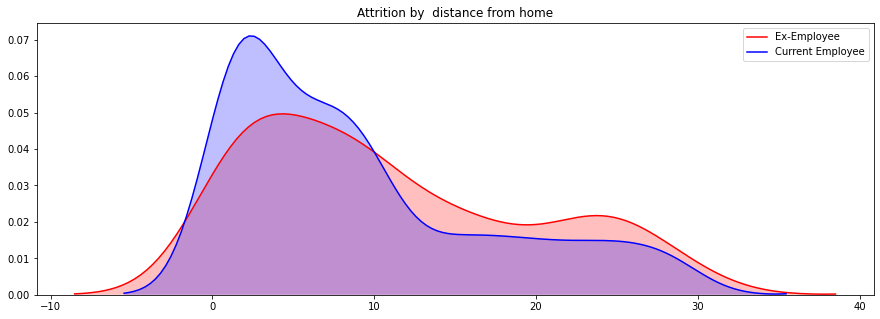

In [17]:
#Attrition by distance from home
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['DistanceFromHome'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['DistanceFromHome'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by  distance from home')
print('Ex-employees')
print(ex_employee.agg({'DistanceFromHome':['mean','median']}))
print('Current employees')
print(current_employee.agg({'DistanceFromHome':['mean','median']}))

- DistanceFromHome: As expected, In general, the lower the distance from home the lesser rate of attrition.

Distance impact the attrition rate. Employees who live up to 10 miles from the office present a lower rate of attrition. For longer distances the proportion of employees that leave increases. Clearly emmployees that are really close to the office have a plus to stay. The average and median distance values for employees who left are 2 miles higher than for the employees who stay (mean: 11 vs 9.0, median  9 vs7.00)

Ex-employees
        MonthlyIncome
mean      4843.878947
median    3373.000000
Current employees
        MonthlyIncome
mean      6871.638945
median    5237.500000


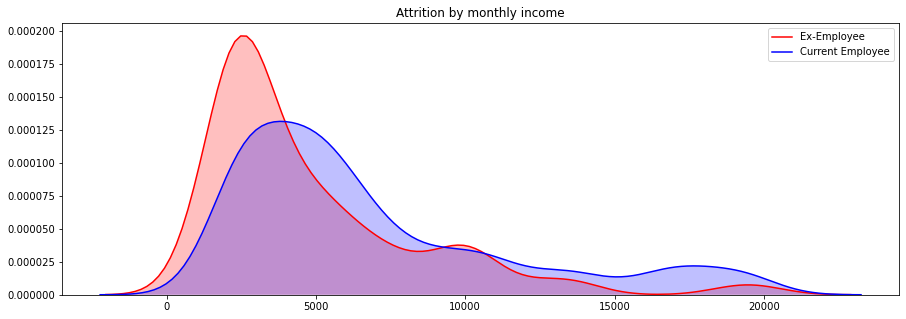

In [18]:
#Attrition by monthly income
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['MonthlyIncome'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['MonthlyIncome'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by monthly income')
print('Ex-employees')
print(ex_employee.agg({'MonthlyIncome':['mean','median']}))
print('Current employees')
print(current_employee.agg({'MonthlyIncome':['mean','median']}))

Up to a monthly income of around 4000, clearly lower monthly income employees attrition rate is higher. Mean monthly income of ex-employees is 4844 and for employees who stayed is 6871.

Ex-employees
        NumCompaniesWorked
mean              2.968421
median            1.000000
Current employees
        NumCompaniesWorked
mean              2.639959
median            2.000000


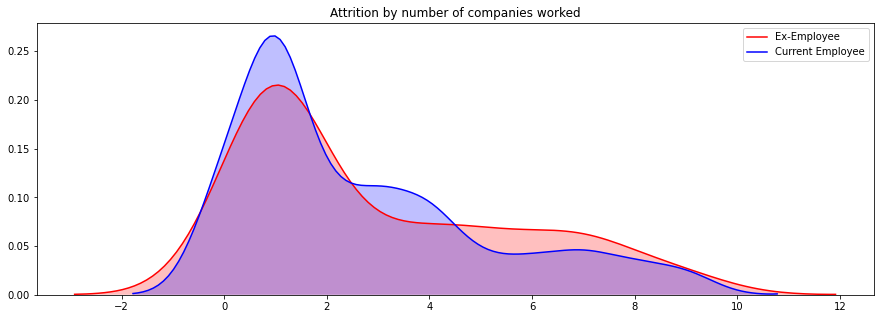

In [19]:
#Attrition by number of companies worked
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['NumCompaniesWorked'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['NumCompaniesWorked'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by number of companies worked')
print('Ex-employees')
print(ex_employee.agg({'NumCompaniesWorked':['mean','median']}))
print('Current employees')
print(current_employee.agg({'NumCompaniesWorked':['mean','median']}))

There is no big difference in the distributions. Employees that have worked for 2 companies or less slightly tend to stay and employees who have worked for 5 ot more companies slightly have a higher rate of attrition. This feature does not present a high impact in the attrition.

Ex-employees
        PercentSalaryHike
mean            15.163158
median          14.000000
Current employees
        PercentSalaryHike
mean            15.254564
median          14.000000


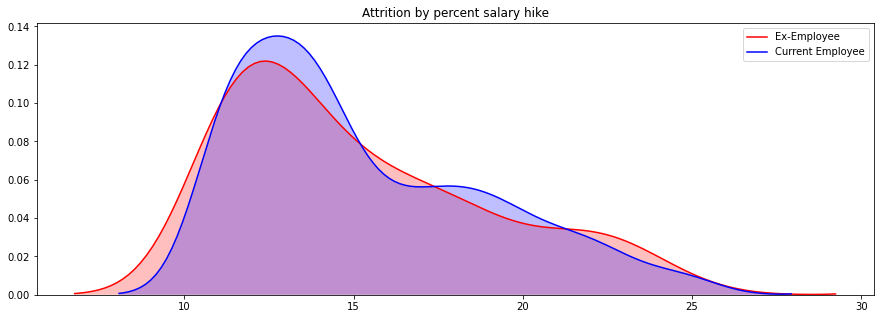

In [20]:
#Attrition by percent salary hike
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['PercentSalaryHike'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['PercentSalaryHike'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by percent salary hike')
print('Ex-employees')
print(ex_employee.agg({'PercentSalaryHike':['mean','median']}))
print('Current employees')
print(current_employee.agg({'PercentSalaryHike':['mean','median']}))

Distributions are very similar.The means are simialr and de median equal. Just in the lower percentage (around 11% and less of salary hike), the probability of leaving is a little bit higher. For  percentages above 11% there is not much difference.

Ex-employees
        TotalWorkingYears
mean             8.057895
median           7.000000
Current employees
        TotalWorkingYears
mean            12.002028
median          10.000000


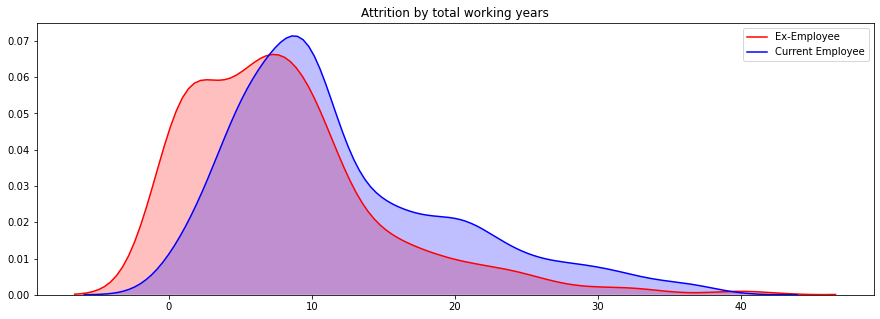

In [21]:
#Attrition by total working years
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['TotalWorkingYears'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['TotalWorkingYears'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by total working years')
print('Ex-employees')
print(ex_employee.agg({'TotalWorkingYears':['mean','median']}))
print('Current employees')
print(current_employee.agg({'TotalWorkingYears':['mean','median']}))

The attrition probability is higher in employees with less working years. When employess have accumualted around 9 years, the attrition is reduced and the probability of staying in the company increases. Mean of total working years fo ex-employees is 8, while for current employees is 12 years.

Ex-employees
        TrainingTimesLastYear
mean                 2.647368
median               2.000000
Current employees
        TrainingTimesLastYear
mean                 2.781947
median               3.000000


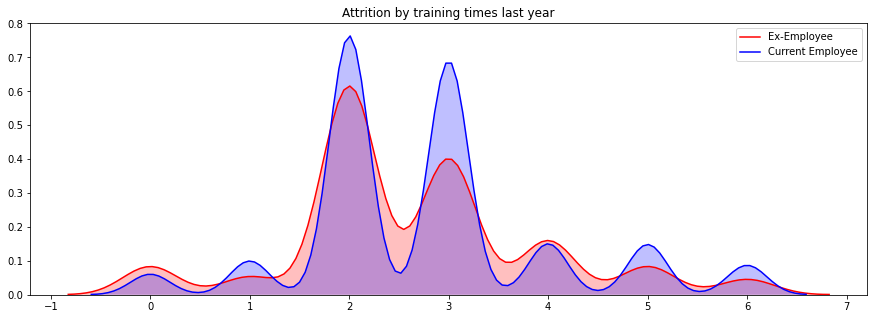

In [22]:
#Attrition by training times last year
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['TrainingTimesLastYear'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['TrainingTimesLastYear'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by training times last year')
print('Ex-employees')
print(ex_employee.agg({'TrainingTimesLastYear':['mean','median']}))
print('Current employees')
print(current_employee.agg({'TrainingTimesLastYear':['mean','median']}))

In general, receiving training seems to increase the probaility of staying in the company.

Ex-employees
        YearsAtCompany
mean               4.9
median             3.0
Current employees
        YearsAtCompany
mean          7.464503
median        6.000000


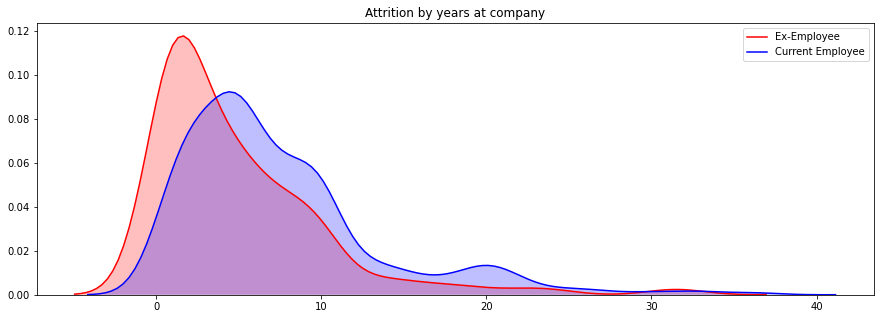

In [23]:
#Attrition by years at company
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsAtCompany'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsAtCompany'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years at company')
print('Ex-employees')
print(ex_employee.agg({'YearsAtCompany':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsAtCompany':['mean','median']}))

 The longer the employees stay in the company, the lower the chances of attrition. The peak of attrition is reached for employees with between two and three years at the company. Employees who reach between three and four years have more probabilities of staying. Average tenure of employees who left is 4.9 vs 7.5 of the employees who stay.

Ex-employees
        YearsInCurrentRole
mean              2.873684
median            2.000000
Current employees
        YearsInCurrentRole
mean              4.492901
median            3.000000


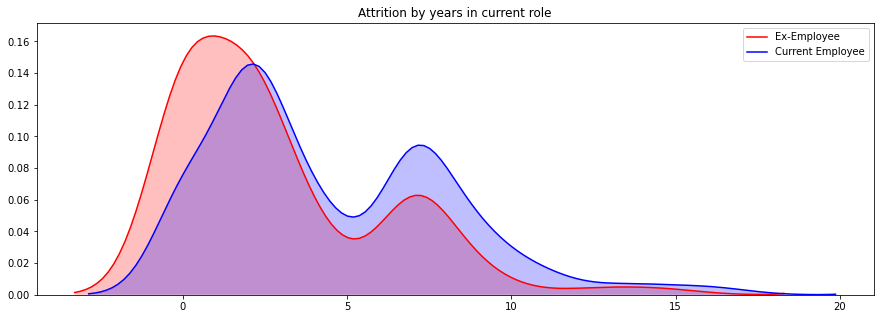

In [24]:
#Attrition by years in current role
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsInCurrentRole'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsInCurrentRole'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years in current role')
print('Ex-employees')
print(ex_employee.agg({'YearsInCurrentRole':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsInCurrentRole':['mean','median']}))

Similar pattern than years at company. Employees with longer years in their roles tend to stay in the company.

Ex-employees
        YearsSinceLastPromotion
mean                   1.868421
median                 1.000000
Current employees
        YearsSinceLastPromotion
mean                   2.243408
median                 1.000000


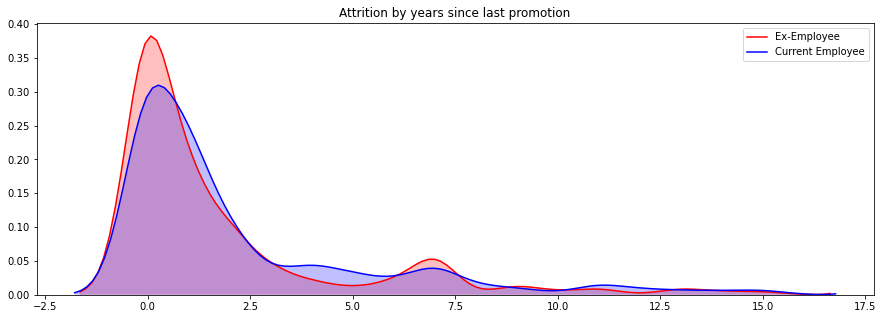

In [25]:
#Attrition by years since last promotion
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsSinceLastPromotion'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsSinceLastPromotion'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years since last promotion')
print('Ex-employees')
print(ex_employee.agg({'YearsSinceLastPromotion':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsSinceLastPromotion':['mean','median']}))

We were expecting to see that those employees with more time passed since their last promotion would have higher rate of attrition. However, this is not shown in the chart. Higher probability of attrition is at zero years, which doesn't make too much sense. One possible explanation is that perhaps employees that have never been promoted are counted with 0 years since last promotion. Let's check the values of this feature:

In [20]:
employee_df_train['YearsSinceLastPromotion'].value_counts()

0     467
1     286
2     124
7      62
4      52
3      40
5      35
6      25
11     20
9      14
8      14
15      9
13      9
12      9
14      7
10      3
Name: YearsSinceLastPromotion, dtype: int64

Total number of employees with 0 years since las last promotion is 581, the larger group in the dataset. This doesn't make sense, so as we thought probably employees never promoted are assigned a value of 0.

Ex-employees
        YearsWithCurrManager
mean                2.826316
median              2.000000
Current employees
        YearsWithCurrManager
mean                4.460446
median              3.000000


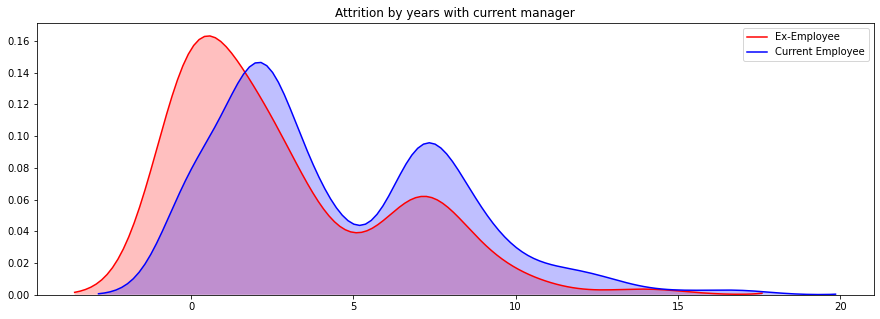

In [21]:
#Attrition by years with current manager
plt.figure(figsize=(15,5))
sns.kdeplot(ex_employee['YearsWithCurrManager'],label='Ex-Employee',shade=True, color='r')
sns.kdeplot(current_employee['YearsWithCurrManager'],label='Current Employee',shade=True, color='b')
plt.title('Attrition by years with current manager')
print('Ex-employees')
print(ex_employee.agg({'YearsWithCurrManager':['mean','median']}))
print('Current employees')
print(current_employee.agg({'YearsWithCurrManager':['mean','median']}))

Employees with more years with the same manager present lower probability of attrition. The distributions are similar to the YearInCurrent role distributions.

Conclusion:   
Perhaps we were expecting to have more impact on the attrition in some variables such as the number of companies worked for or the percent of salary hike, but for the most part we have confirmed most of the preliminar hypothesis.

### RELATION BETWEEN VARIABLES
We will now explore the relationship between the different variables in the dataset using a correlation matrix.

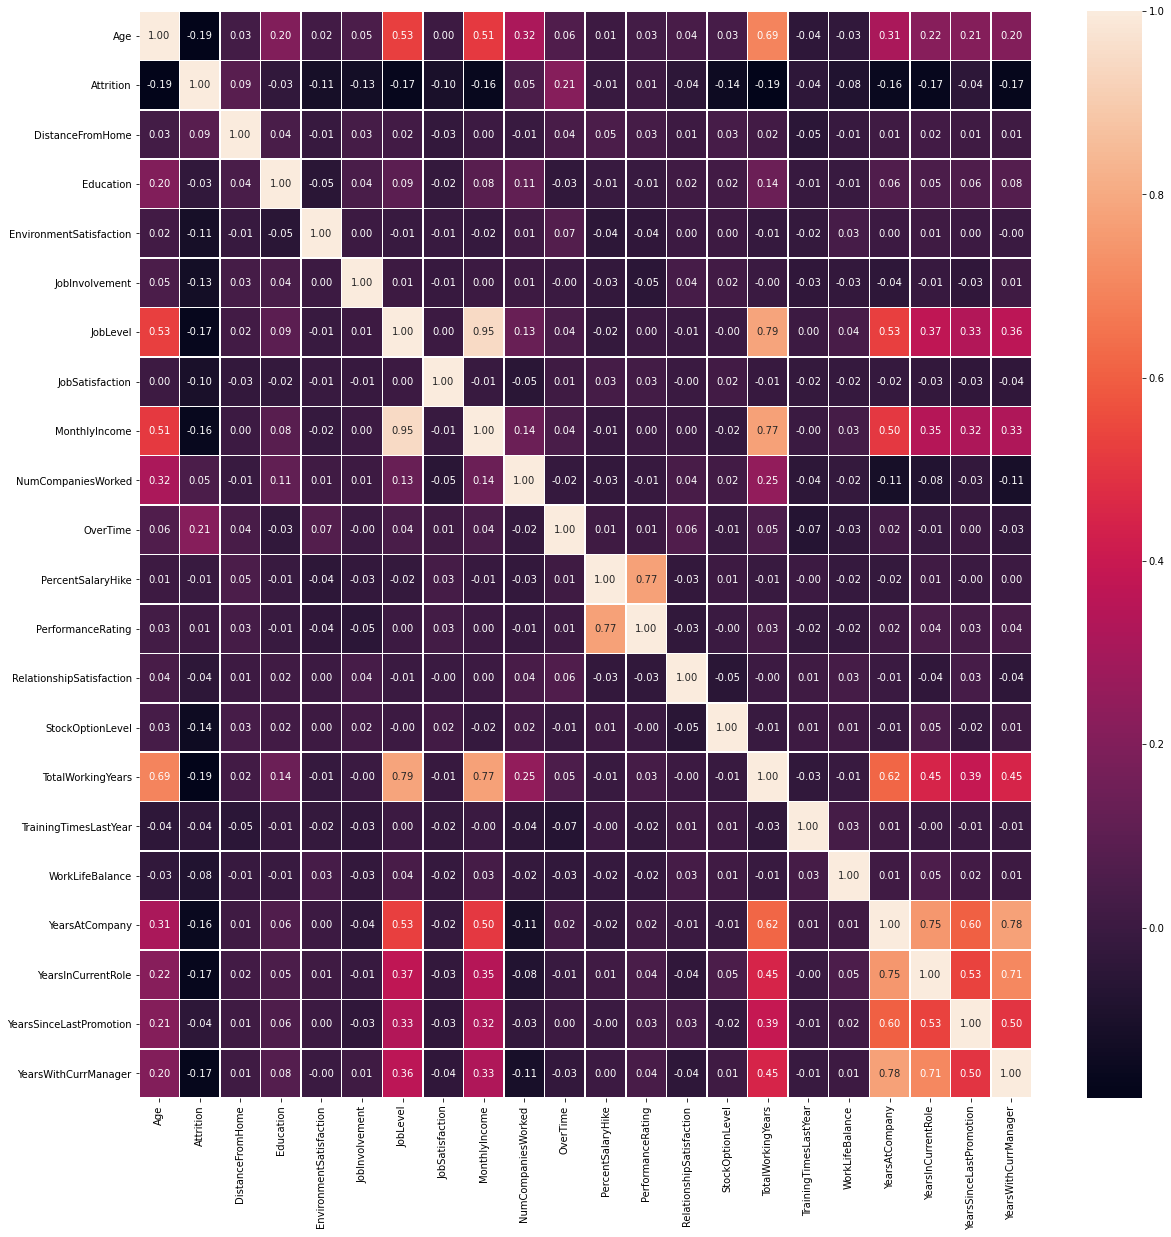

In [66]:
correlations = employee_df_train.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True,linewidths=.5, fmt= '.2f',ax=ax)

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

- Strong positive correlation between the job level and monthly income and also between job level and total working years of the employee , which is logical. 
- The age of the employee and the total working years there are also correlated.
- Years at current role, yeasr since last promotion, and years with current manager are positively correlated with years at the company.
- Percent salary hike is correlated to the performance rating 

Further exploration can be done with the dataset. For example, plotting gender vs monthly income to see if there is a gender wage gap:

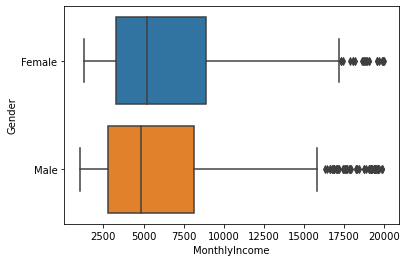

In [22]:
# Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome',y='Gender',data=employee_df_train)

We see that female mean salary is higher than male.   
We can also, for example, plot the job role vs the monthly income to figure out how the salaries for different roles compare:

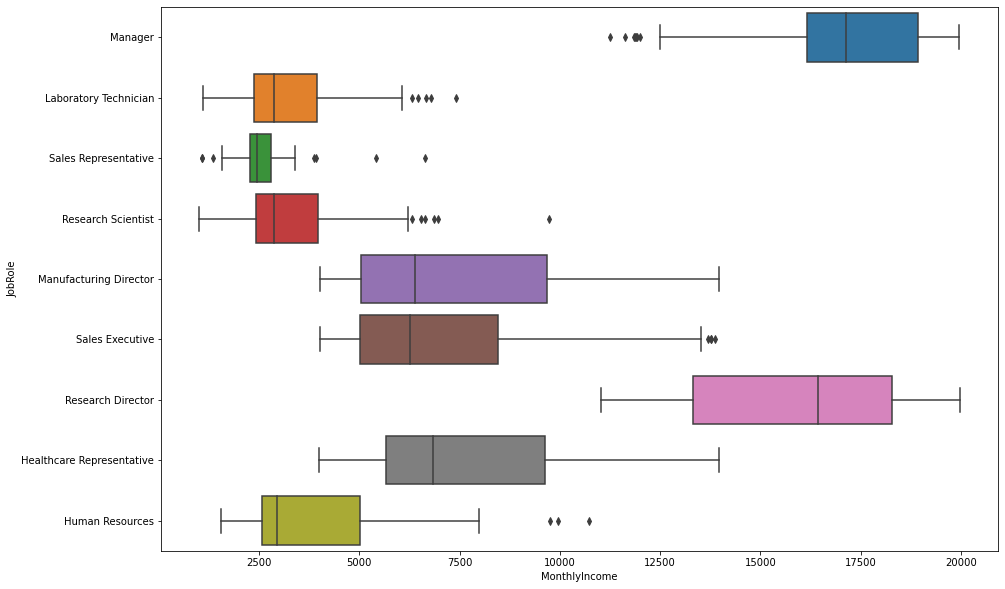

In [30]:
#the JobRole vs. Monthly Income
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=employee_df_train)

But in the current analysis we are focused in the attrition, so we will move forward to the data preparation step.

## DATA PREPROCESSING AND CLEANING

In [287]:
X_cat=employee_df_train[employee_df_train.columns[employee_df_train.dtypes==object]]
X_num=employee_df_train[employee_df_train.columns[employee_df_train.dtypes!=object]]
X_num=X_num.drop('Attrition',axis=1)

In [288]:
#Using OneHOtEncoding to encode the categorical variables
encoder=OneHotEncoder()
X_cat=encoder.fit_transform(X_cat).toarray()
X_cat_df=pd.DataFrame(X_cat)
X_cat_df.columns=encoder.get_feature_names()

In [289]:
#Scaling the numerical features
scaler=MinMaxScaler()
X_num_df =pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns)

In [290]:
X_train=pd.concat([X_cat_df,X_num_df],axis=1)

In [291]:
y_train=employee_df_train['Attrition']
y_train=y.reset_index(drop=True)

We repeat the same steps for the test set, except that this time we don't fit the encoder and the scaler

In [292]:
X_cat_=employee_df_test[employee_df_test.columns[employee_df_test.dtypes==object]]
X_num_=employee_df_test[employee_df_test.columns[employee_df_test.dtypes!=object]]
X_num_=X_num_.drop('Attrition',axis=1)
X_cat_=encoder.transform(X_cat_).toarray()
X_cat_df_=pd.DataFrame(X_cat_)
X_cat_df_.columns=encoder.get_feature_names()
X_num_df_ =pd.DataFrame(scaler.transform(X_num_),columns=X_num_.columns)

X_test=pd.concat([X_cat_df_,X_num_df_],axis=1)
y_test=employee_df_test['Attrition']
y_test=y_test.reset_index(drop=True)

## BUILD MODEL

#### - Logistic Regression



In [151]:
logreg=LogisticRegression(solver='lbfgs')

In [259]:
scores=cross_val_score(logreg,X_train,y_train,scoring='accuracy',cv=5)

In [260]:
print('Accuracy {:.2f} %'.format(100*scores.mean()))

Accuracy 88.10 %


We have obtained an accuracy of 88.10%. However, we have an imabalnced dataset with almost around 85% of employees that stay (attrition=0) and just 15% of employees that left (attrition=1). That means that just by creating a model that just predicts that all employees stay, we would obtain an accuracy of 85%. Accuracy is not an adequate scoring metric in this situation, so let's take a closer look to the results using the confusion matrix and the classification report.


In [261]:
y_pred=cross_val_predict(logreg, X_train, y_train, cv=5)

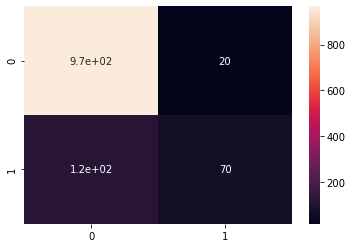

In [262]:
cm=confusion_matrix(y_train,y_pred)
sns.heatmap(cm,annot=True)

In [129]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       986
           1       0.78      0.37      0.50       190

    accuracy                           0.88      1176
   macro avg       0.83      0.67      0.72      1176
weighted avg       0.87      0.88      0.86      1176



Acceptable precission 78% which means that when the model identifies a postitive (attrition), in 78% of the cases it will be right. However the recall is low, only 37%, which means that the model is only able to identify correctly 37% of the employees that leave. Let's take a look to the precision-recall curve:

In [172]:
y_proba = cross_val_predict(logreg, X_train, y_train, cv=5, method='predict_proba')

In [78]:
precisions,recalls,thresholds=precision_recall_curve(y_train,y_proba[:,1])

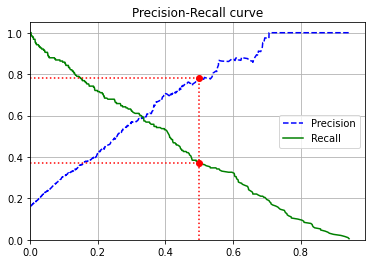

In [79]:
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
plt.plot([0, 0.5], [0.37, 0.37],"r:")                               
plt.plot([0, 0.5], [0.78, 0.78],"r:")# Not shown
plt.plot([0.5,0.5], [0, 0.78],"r:")# Not shown
plt.plot([0.5], [0.37], "ro")                                            
plt.plot([0.5], [0.78], "ro")  
plt.legend()
plt.title('Precision-Recall curve')
plt.xlim(xmin=0) 
plt.ylim(ymin=0) 
plt.grid(which='both')
plt.show()

(0.0, 1.0418118466898956)

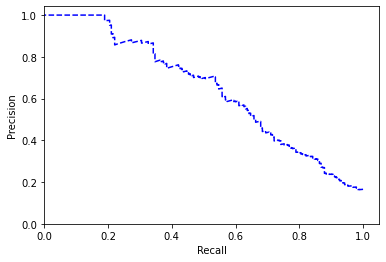

In [80]:
#Precision recall urve
plt.plot(recalls,precisions,'b--')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim(xmin=0) 
plt.ylim(ymin=0) 

By modifyig the threshold of 0.5 used by default by the model to decide the class, we can tweak the precision and recall of the model. However, because of the precision/recall trade off, every time we increase one of the parameters the other one will decrease. For example, if we want to increase the recall (% of positive cases that the model is able to identify), we can reduce the threshold. Let's see what happens if we set a threshold of 0.4 and a threshold of 0.2:

In [175]:
y_pred_04=(y_proba[:,1]>0.4).astype(int)
y_pred_02=(y_proba[:,1]>0.2).astype(int)

In [176]:
print(classification_report(y_train,y_pred_04))
print(classification_report(y_train,y_pred_02))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       986
           1       0.71      0.53      0.61       190

    accuracy                           0.89      1176
   macro avg       0.81      0.74      0.77      1176
weighted avg       0.88      0.89      0.88      1176

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       986
           1       0.42      0.72      0.53       190

    accuracy                           0.79      1176
   macro avg       0.68      0.76      0.70      1176
weighted avg       0.85      0.79      0.81      1176



As we can see, indeed the recall has increased, but at the expense of the precision. We could askd HR department to see which percentages they are comfortable with.  
However, a preferable option is to to try to increase the recall without compromising the precision. To do that we just will try to tune the hyperparameters of the model by performing a gridsearch.

In [136]:
#Gridsearch
#Need to create a training set for tuning the model parameters and a validation set to evaluate the tunned model
X_train['Attrition']=y_train

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,val_index in split.split(X_train,X_train['Attrition']):
    train_grid=X_train.loc[train_index]
    val_grid=X_train.loc[val_index]

y_train_grid=train_grid['Attrition']
X_train_grid=train_grid
X_train_grid.drop('Attrition',inplace=True,axis=1)
y_val_grid=val_grid['Attrition']
X_val_grid=val_grid
X_val_grid.drop('Attrition',inplace=True,axis=1)


In [232]:
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'solver':['liblinear'],'penalty': ['l1', 'l2', ],'C': [0.001,0.01,0.1,1,10,100]}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_logreg_auc = GridSearchCV(logreg, params, cv=kf,scoring=scoring,return_train_score='True',refit='AUC')
grid_logreg_auc.fit(X_train_grid,y_train_grid)

C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit='AUC', return_train_score='True',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'acc

Text(0.5, 1.0, 'Feature Importance (coef)-LogisticRegression')

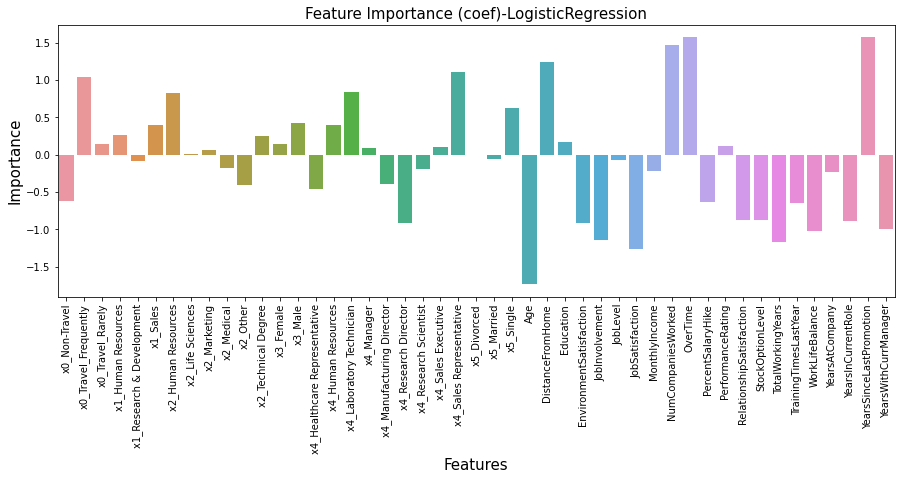

In [302]:
Feature_Importance=grid_logreg_auc.best_estimator_.coef_.transpose()
Feature_Importance_df=pd.DataFrame(Feature_Importance,index=X_train_grid.columns,columns=['coef'])
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
sns.barplot(x=X_train_grid.columns, y=Feature_Importance_df['coef'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.title('Feature Importance (coef)-LogisticRegression', fontsize=15)

In [253]:
Feature_Importance_df

,coef
x0_Non-Travel,-0.621682
x0_Travel_Frequently,1.042590
x0_Travel_Rarely,0.146277
x1_Human Resources,0.258538
x1_Research & Development,-0.085289
x1_Sales,0.393936
x2_Human Resources,0.827296
x2_Life Sciences,0.005559
x2_Marketing,0.061267
x2_Medical,-0.175603


In [523]:
grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [530]:
y_val_grid_pred=grid.predict(X_val_grid)

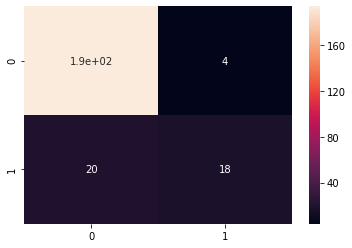

In [531]:
cm=confusion_matrix(y_val_grid,y_val_grid_pred)
sns.heatmap(cm,annot=True)

In [532]:
print(classification_report(y_val_grid,y_val_grid_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       198
           1       0.82      0.47      0.60        38

    accuracy                           0.90       236
   macro avg       0.86      0.73      0.77       236
weighted avg       0.89      0.90      0.89       236



In [534]:
#GridSearch f1
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'solver':['liblinear'],'penalty': ['l1', 'l2', ],'C': [0.001,0.01,0.1,1,10,100]}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid = GridSearchCV(logreg, params, cv=kf,scoring=scoring,return_train_score='True',refit='f1')
grid.fit(X_train_grid,y_train_grid)
y_val_grid_pred=grid.predict(X_val_grid)
print(classification_report(y_val_grid,y_val_grid_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       198
           1       0.78      0.55      0.65        38

    accuracy                           0.90       236
   macro avg       0.85      0.76      0.79       236
weighted avg       0.90      0.90      0.90       236



Maximum recall we can obtain by adjusting the hyperparameters is 0.55
Improve everything, but still the recall is low. To increase it Ideally, we could achieve that by requesting more samples of the minority class (employees that left;attrition=1) but probably if there is no more available. Instead, we can use sampling techniques to generate the extra samples. We will use oversampling and SMOTE...

In [162]:
##Random Over Sampling
ros=RandomOverSampler(random_state=2,sampling_strategy='minority')
sm = SMOTE(random_state=2)
##Synthetic Minority Oversampling Technique (SMOTE)
#Combining over- and under-sampling.
#SMOTE Tomek
smt = SMOTETomek(ratio='auto')

In [168]:
ros = RandomOverSampler(random_state=2,sampling_strategy='minority')
steps = [('ros', ros), ('model', logreg)]
pipeline = Pipeline(steps=steps)
y_pred_ros=cross_val_predict(pipeline, X_train, y_train, cv=5)
print(classification_report(y_train,y_pred_ros))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       986
           1       0.37      0.71      0.49       190

    accuracy                           0.76      1176
   macro avg       0.65      0.74      0.66      1176
weighted avg       0.84      0.76      0.78      1176



In [169]:
sm = SMOTE(random_state=2)
steps = [('SMOTE', sm), ('model', logreg)]
pipeline = Pipeline(steps=steps)
y_pred_sm=cross_val_predict(pipeline, X_train, y_train, cv=5)
print(classification_report(y_train,y_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       986
           1       0.39      0.73      0.51       190

    accuracy                           0.77      1176
   macro avg       0.66      0.75      0.68      1176
weighted avg       0.85      0.77      0.80      1176



In [170]:
sm = SMOTETomek(ratio='auto')
steps = [('SMOTETomek', smt), ('model', logreg)]
pipeline = Pipeline(steps=steps)
y_pred_smt=cross_val_predict(pipeline, X_train, y_train, cv=5)
print(classification_report(y_train,y_pred_smt))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       986
           1       0.39      0.71      0.50       190

    accuracy                           0.77      1176
   macro avg       0.66      0.75      0.68      1176
weighted avg       0.85      0.77      0.80      1176



In [ ]:
Similar results than when using a 0.2 threshold. Not an alternative.

In the classification report we can see how both the precision and recall have increased, achieving the best results so far. Last step is to apply this last model to the test set.

In [ ]:
#Results['Model'][6].best_estimator_.steps[1][1].coef_ #Logreg

Feature_Importance=Results['Model'][10].best_estimator_.steps[0][1].feature_importances_ #RFC
#Results['Model'][9].best_estimator_.steps[0][1].feature_importances_ #DT
#Results['Model'][6].best_estimator_.steps[1][1].coef_ #Logreg
#Results['Model'][7].best_estimator_.steps[1][1].coef_ #SVM
#Results['Model'][11].best_estimator_.steps[1][1].feature_importances_ #xgb

plt.xticks(rotation='90')
sns.barplot(x=X.columns, y=Feature_Importance)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.title('Feature Importance-RFC', fontsize=15)

#### - Random Forest

In [187]:
RFC=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(RFC,X,y,scoring='accuracy',cv=5)
print('Accuracy {:.2f} %'.format(100*scores.mean()))

Accuracy 86.57 %


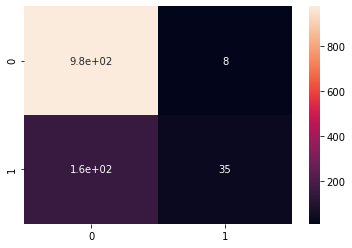

In [90]:
y_pred=cross_val_predict(RFC, X, y, cv=5)
cm=confusion_matrix(y,y_pred)
sns.heatmap(cm,annot=True)

In [91]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       986
           1       0.81      0.18      0.30       190

    accuracy                           0.86      1176
   macro avg       0.84      0.59      0.61      1176
weighted avg       0.86      0.86      0.82      1176



Worse results than with logistic regression. Let's try adjusting hte hyperparameters:

C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


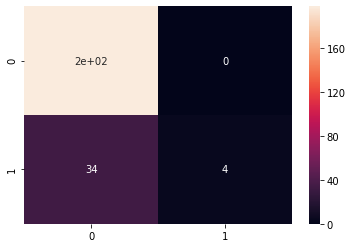

In [301]:
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20)),'max_features' : list(range(1,4,1))}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_rfc_auc = GridSearchCV(RFC, params, cv=kf,scoring=scoring,return_train_score='True',refit='AUC')
grid_rfc_auc.fit(X_train_grid,y_train_grid)

y_val_grid_pred=grid_rfc_auc.predict(X_val_grid)

cm=confusion_matrix(y_val_grid,y_val_grid_pred)
sns.heatmap(cm,annot=True)

In [303]:
print(classification_report(y_val_grid,y_val_grid_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       198
           1       1.00      0.11      0.19        38

    accuracy                           0.86       236
   macro avg       0.93      0.55      0.56       236
weighted avg       0.88      0.86      0.80       236



C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


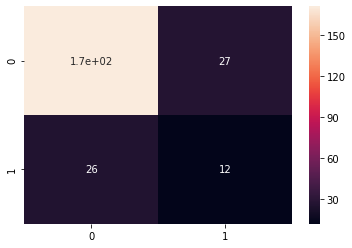

In [304]:
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20)),'max_features' : list(range(1,4,1))}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_rfc_f1 = GridSearchCV(RFC, params, cv=kf,scoring=scoring,return_train_score='True',refit='f1')
grid_rfc_f1.fit(X_train_grid,y_train_grid)

y_val_grid_pred=grid_rfc_f1.predict(X_val_grid)

cm=confusion_matrix(y_val_grid,y_val_grid_pred)
sns.heatmap(cm,annot=True)

In [305]:
print(classification_report(y_val_grid,y_val_grid_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       198
           1       0.31      0.32      0.31        38

    accuracy                           0.78       236
   macro avg       0.59      0.59      0.59       236
weighted avg       0.78      0.78      0.78       236



Text(0.5, 1.0, 'Feature Importance-RFC')

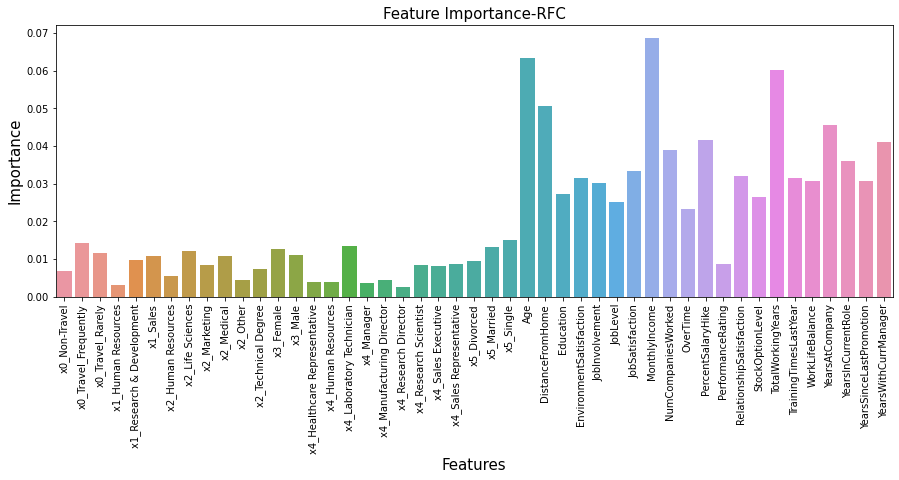

In [207]:
Feature_Importance=grid_rfc_auc.best_estimator_.feature_importances_ 
plt.figure(figsize=(15,5))
plt.xticks(rotation='90')
sns.barplot(x=X_train_grid.columns, y=Feature_Importance)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.title('Feature Importance-RFC', fontsize=15)

In [231]:
Feature_Importance_df=pd.DataFrame(Feature_Importance,index=X_train_grid.columns)
Feature_Importance_df.sort_values(0,ascending=False).head(10)

,0
MonthlyIncome,0.068708
Age,0.063267
TotalWorkingYears,0.060110
DistanceFromHome,0.050498
YearsAtCompany,0.045521
PercentSalaryHike,0.041515
YearsWithCurrManager,0.041172
NumCompaniesWorked,0.038905
YearsInCurrentRole,0.036053
JobSatisfaction,0.033292


In [297]:
X_train2['Attrition']=y_train
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,val_index in split.split(X_train2,X_train2['Attrition']):
    train_grid2=X_train2.loc[train_index]
    val_grid2=X_train2.loc[val_index]

y_train_grid2=train_grid2['Attrition']
X_train_grid2=train_grid2
X_train_grid2.drop('Attrition',inplace=True,axis=1)
y_val_grid2=val_grid2['Attrition']
X_val_grid2=val_grid2
X_val_grid2.drop('Attrition',inplace=True,axis=1)

C:\Users\lcast\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [298]:
scoring = {'AUC': 'roc_auc', 'Precision': 'precision', 'Recall':'recall','Accuracy':'accuracy','f1':'f1'}
params = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20)),'max_features' : list(range(1,4,1))}
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42) 

grid_rfc_auc = GridSearchCV(RFC, params, cv=kf,scoring=scoring,return_train_score='True',refit='AUC')
grid_rfc_auc.fit(X_train_grid2,y_train_grid2)



C:\Users\lcast\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ValueError: X has 10 features per sample; expecting 47

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       198
           1       1.00      0.03      0.05        38

    accuracy                           0.84       236
   macro avg       0.92      0.51      0.48       236
weighted avg       0.87      0.84      0.78       236



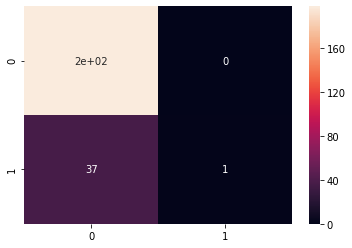

In [300]:
y_val_grid_pred2=grid_rfc_auc.predict(X_val_grid2)

cm=confusion_matrix(y_val_grid2,y_val_grid_pred2)
sns.heatmap(cm,annot=True)
print(classification_report(y_val_grid2,y_val_grid_pred2))

#### - Neural Network



In [263]:
model=tf.keras.models.Sequential()

In [264]:
model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape=(47,)))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) #since it's classification we use sigmoid in the output

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               24000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 525,501
Trainable params: 525,501
Non-trainable params: 0
_________________________________________________________________


In [265]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [266]:
epochs_history=model.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
1176/1176 [==============================] - 1s 1ms/step - loss: 0.4166 - acc: 0.8333
Epoch 2/100
1176/1176 [==============================] - 0s 129us/step - loss: 0.3356 - acc: 0.8690
Epoch 3/100
1176/1176 [==============================] - 0s 134us/step - loss: 0.3032 - acc: 0.8912
Epoch 4/100
1176/1176 [==============================] - 0s 119us/step - loss: 0.2567 - acc: 0.9022
Epoch 5/100
1176/1176 [==============================] - 0s 117us/step - loss: 0.2428 - acc: 0.9107
Epoch 6/100
1176/1176 [==============================] - 0s 118us/step - loss: 0.2370 - acc: 0.9090
Epoch 7/100
1176/1176 [==============================] - 0s 124us/step - loss: 0.1872 - acc: 0.9303
Epoch 8/100
1176/1176 [==============================] - 0s 126us/step - loss: 0.1627 - acc: 0.9422
Epoch 9/100
1176/1176 [==============================] - 0s 126us/step - loss: 0.1481 - acc: 0.9447
Epoch 10/100
1176/1176 [==============================] - 0s 126us/step - loss: 0.1027 - acc: 0.9668
E

In [267]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

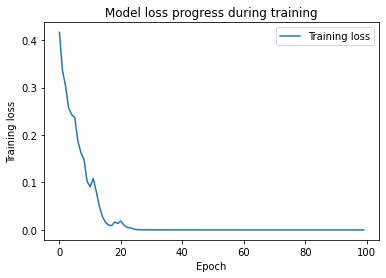

In [268]:
plt.plot(epochs_history.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

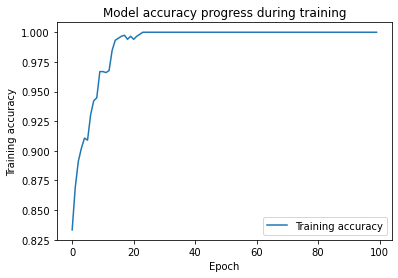

In [269]:
plt.plot(epochs_history.history['acc'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

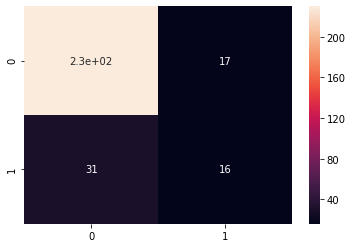

In [270]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [271]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       247
           1       0.48      0.34      0.40        47

    accuracy                           0.84       294
   macro avg       0.68      0.64      0.65       294
weighted avg       0.82      0.84      0.82       294



In [278]:
weights={0:1,1:15}
epochs_history=model.fit(X_train,y_train,epochs=100,batch_size=50,class_weight=weights)

Epoch 1/100
1176/1176 [==============================] - 0s 148us/step - loss: 3.2272e-06 - acc: 1.0000
Epoch 2/100
1176/1176 [==============================] - 0s 153us/step - loss: 3.0127e-06 - acc: 1.0000
Epoch 3/100
1176/1176 [==============================] - 0s 139us/step - loss: 2.8619e-06 - acc: 1.0000
Epoch 4/100
1176/1176 [==============================] - 0s 132us/step - loss: 2.7240e-06 - acc: 1.0000
Epoch 5/100
1176/1176 [==============================] - 0s 139us/step - loss: 2.6085e-06 - acc: 1.0000
Epoch 6/100
1176/1176 [==============================] - 0s 138us/step - loss: 2.5378e-06 - acc: 1.0000
Epoch 7/100
1176/1176 [==============================] - 0s 136us/step - loss: 2.4669e-06 - acc: 1.0000
Epoch 8/100
1176/1176 [==============================] - 0s 137us/step - loss: 2.4123e-06 - acc: 1.0000
Epoch 9/100
1176/1176 [==============================] - 0s 141us/step - loss: 2.3694e-06 - acc: 1.0000
Epoch 10/100
1176/1176 [==============================] - 0s 142

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       247
           1       0.47      0.32      0.38        47

    accuracy                           0.83       294
   macro avg       0.67      0.63      0.64       294
weighted avg       0.81      0.83      0.82       294



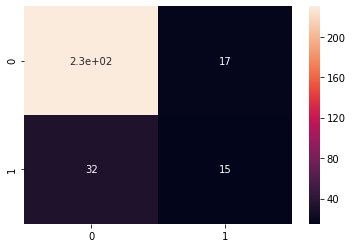

In [279]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Conclusions & Recommendations¶
Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
Over Time: people who work overtime are more likely to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
Age: Employees in relatively young age bracket 25–35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving.
YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.
YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year.
Several metrics can be used here to determine whether action should be taken with a Line Manager:
# of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
Patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.